# OKC NBA 2019/20 SEASON

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import unicodedata
from math import pi
%matplotlib inline

# Part 1
## Visualisation of regular season stats 2019-2020 - Thunders

In [157]:
#Importing data
MM = pd.read_excel("OKC.xlsx", sheet_name='Match by Match')

In [158]:
MM.head()

,G,Date,Start (ET),Opponent,W/L,Unnamed: 5,Tm,Opp,W,L,Streak,Date.1,Unnamed: 12,Starting Lineup
0,1,"Wed, Oct 23, 2019",9:00p,Utah Jazz,L,NaN,95,100,0,1,L 1,"Wed, Oct 23, 2019",NaN,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul
1,2,"Fri, Oct 25, 2019",8:00p,Washington Wizards,L,NaN,85,97,0,2,L 2,"Fri, Oct 25, 2019",NaN,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul
2,3,"Sun, Oct 27, 2019",3:30p,Golden State Warriors,W,NaN,120,92,1,2,W 1,"Sun, Oct 27, 2019",NaN,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul
3,4,"Mon, Oct 28, 2019",8:00p,Houston Rockets,L,NaN,112,116,1,3,L 1,"Mon, Oct 28, 2019",NaN,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul
4,5,"Wed, Oct 30, 2019",8:00p,Portland Trail Blazers,L,NaN,99,102,1,4,L 2,"Wed, Oct 30, 2019",NaN,T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · N. Noel · C. Paul


In [159]:
#Dropping & renaming some columns 
MM.drop(['Unnamed: 12', 'Date.1','Streak','Date','Start (ET)'], axis=1, inplace = True)
MM.rename(columns={'Unnamed: 5':'OT'}, inplace = True)

#Creating an empty column to hold the div values
MM['Div']='empty'

In [160]:
#function print the division values of each team

Atlantic = ['Toronto Raptors','Boston Celtics', 'Philadelphia 76ers', 'Brooklyn Nets', 'New York Knicks']
Central = ['Milwaukee Bucks','Indiana Pacers','Chicago Bulls', 'Detroit Pistons', 'Cleveland Cavaliers']
Southeast = ['Miami Heat','Orlando Magic','Charlotte Hornets', 'Washington Wizards', 'Atlanta Hawks']
Northwest = ['Denver Nuggets', 'Oklahoma City Thunder', 'Utah Jazz', 'Portland Trail Blazers', 'Minnesota Timberwolves']
Pacific = ['Los Angeles Lakers', 'Los Angeles Clippers', 'Phoenix Suns', 'Sacramento Kings', 'Golden State Warriors']
Southwest = ['Houston Rockets', 'Dallas Mavericks', 'Memphis Grizzlies', 'San Antonio Spurs', 'New Orleans Pelicans']

def print_division (team):
    if (team in Atlantic):
        return 'ATL'
    elif (team in Central):
        return 'CEN'
    elif (team in Southeast):
        return 'SE'
    elif (team in Northwest):
        return 'NW'
    elif (team in Pacific):
        return 'PAC'
    elif (team in Southwest):
        return 'SW'
    

In [161]:
# looping through the dataframe to print division values

for idx,row in MM.iterrows():
    MM['Div'].loc[idx] = print_division (row['Opponent'])

In [162]:
MM.head()

,G,Opponent,W/L,OT,Tm,Opp,W,L,Starting Lineup,Div
0,1,Utah Jazz,L,NaN,95,100,0,1,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul,NW
1,2,Washington Wizards,L,NaN,85,97,0,2,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul,SE
2,3,Golden State Warriors,W,NaN,120,92,1,2,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul,PAC
3,4,Houston Rockets,L,NaN,112,116,1,3,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul,SW
4,5,Portland Trail Blazers,L,NaN,99,102,1,4,T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · N. Noel · C. Paul,NW


In [24]:
#function to apply color to the bar chart

col = []
for val in MM['W/L']:
    if val =='L':
        col.append('red')
    else:
        col.append('green')

#Creating two data frames which i am using for drawing the average lines in the below plot
W = MM[MM['W/L']=='W']
L = MM[MM['W/L']=='L']

Leg = ['Win', 'Loss']
avg = ['Win Avg', 'Loss Avg']

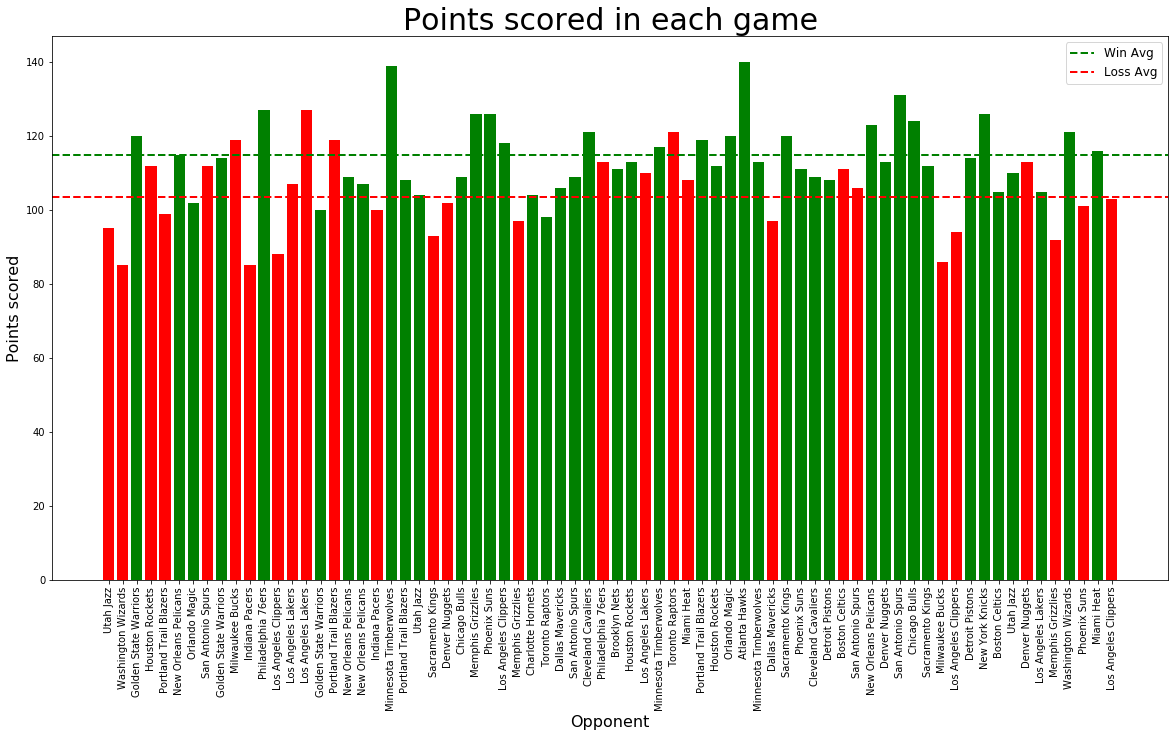

In [25]:
# Bar plot using matplotlib

plt.figure(figsize=(20,10))
x = plt.bar(MM['G'],MM['Tm'], color = col)
plt.xticks(np.arange(1,73),MM['Opponent'],rotation=90)
plt.title("Points scored in each game", fontsize=30)
plt.xlabel("Opponent", fontsize=16)
plt.ylabel("Points scored", fontsize=16)

# To draw the average dotted lines
plt.axhline(W['Tm'].mean(), color='green', linewidth=2, linestyle ="--")
plt.axhline(L['Tm'].mean(), color='red', linewidth=2, linestyle ="--")

plt.legend(avg, fontsize = 'large')
plt.show()



In [26]:
#Printing the average values for wins and losses

print ('Average points scored in Winning matches:' , "{:.2f}".format(round(W['Tm'].mean(), 2)))
print ('Average points scored in Losing matches:', "{:.2f}".format(round(L['Tm'].mean(), 2)))

Average points scored in Winning matches: 114.89
Average points scored in Losing matches: 103.39


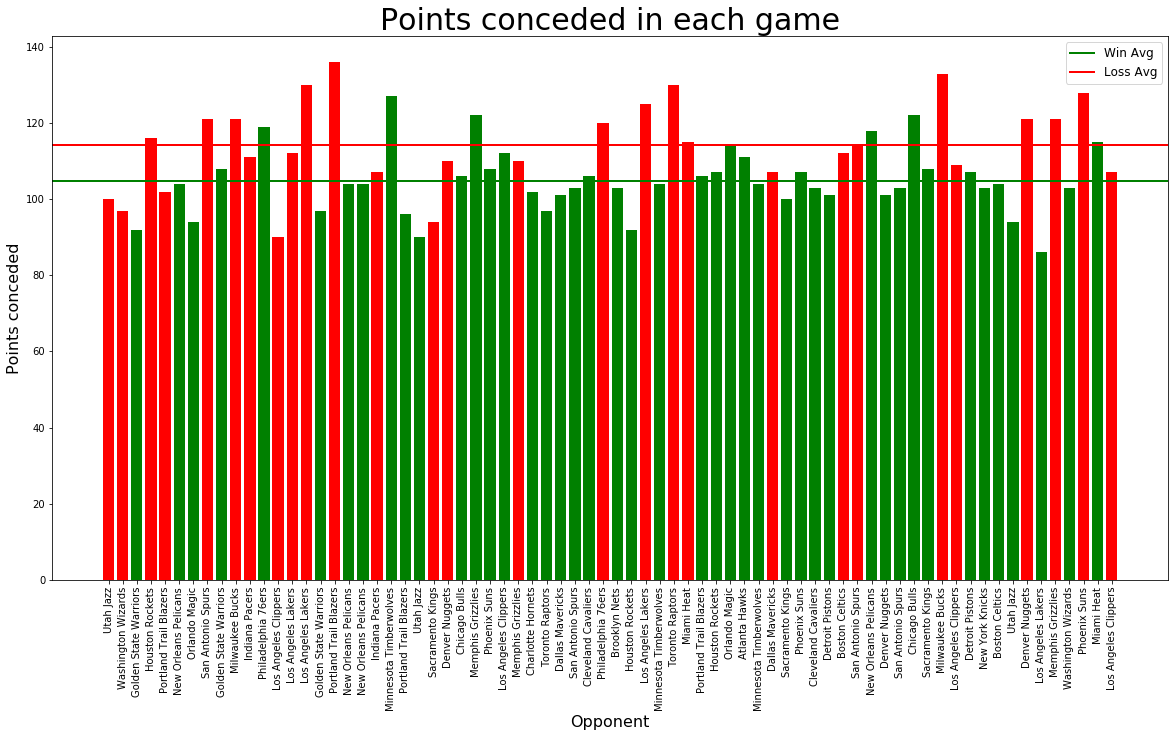

In [27]:
# Bar plot using matplotlib

plt.figure(figsize=(20,10))
plt.bar(MM['G'],MM['Opp'], color = col)
plt.xticks(np.arange(1,73),MM['Opponent'],rotation=90)
plt.title("Points conceded in each game", fontsize=30)
plt.xlabel("Opponent", fontsize=16)
plt.ylabel("Points conceded", fontsize=16)

# To draw the average dotted lines

plt.axhline(W['Opp'].mean(), color='green', linewidth=2, linestyle ="-")
plt.axhline(L['Opp'].mean(), color='red', linewidth=2, linestyle ="-")

plt.legend(avg, fontsize = 'large')
plt.show()


In [28]:
#Printing the average values for wins and losses

print ('Average points conceded in Winning matches:' , "{:.2f}".format(round(W['Opp'].mean(), 2)))
print ('Average points conceded in Losing matches:', "{:.2f}".format(round(L['Opp'].mean(), 2)))

Average points conceded in Winning matches: 104.73
Average points conceded in Losing matches: 114.25


In [167]:
# creating a dataframe called 'OPP' with columns 'Games Played', 'Games Won', 'Games lost' for OKC against each team
Opp = MM['Opponent'].value_counts().rename_axis('Opponents').reset_index(name='GP')

#creating and initilaising empty columns
Opp['GW']=0
Opp['GL']=0
Opp['Div']= 'empty'

Opp.head()
#MM['Opponent'].value_counts()

,Opponents,GP,GW,GL,Div
0,Los Angeles Lakers,4,0,0,empty
1,Portland Trail Blazers,4,0,0,empty
2,New Orleans Pelicans,4,0,0,empty
3,Los Angeles Clippers,4,0,0,empty
4,San Antonio Spurs,4,0,0,empty


In [168]:
#for loop to calculate the no of wins and losses for OKC against each team

CW=0
CL=0

for i,x in Opp.iterrows(): 
    for idx, row in MM.iterrows():
        if (Opp['Opponents'].loc[i]== row['Opponent']) and (row['W/L']=='W'):
            CW+=1
        elif (Opp['Opponents'].loc[i]== row['Opponent']) and (row['W/L']=='L'):
            CL+=1
        
        if (x['Opponents']== row['Opponent']):
            Opp['Div'].loc[i]=row['Div']
    Opp['GW'].loc[i]=CW
    Opp['GL'].loc[i]=CL    
    CW=0
    CL=0


In [169]:
Opp.head()

,Opponents,GP,GW,GL,Div
0,Los Angeles Lakers,4,1,3,PAC
1,Portland Trail Blazers,4,2,2,NW
2,New Orleans Pelicans,4,4,0,SW
3,Los Angeles Clippers,4,1,3,PAC
4,San Antonio Spurs,4,2,2,SW


In [170]:
#creating a new column called Win%

Opp['Win%']=(Opp['GW']/Opp['GP'])*100

In [171]:
#applying formatting to Win% col

Opp['Win%'] = Opp['Win%'].apply('{:.2f}%'.format)
Opp

,Opponents,GP,GW,GL,Div,Win%
0,Los Angeles Lakers,4,1,3,PAC,25.00%
1,Portland Trail Blazers,4,2,2,NW,50.00%
2,New Orleans Pelicans,4,4,0,SW,100.00%
3,Los Angeles Clippers,4,1,3,PAC,25.00%
4,San Antonio Spurs,4,2,2,SW,50.00%
5,Denver Nuggets,3,1,2,NW,33.33%
6,Golden State Warriors,3,3,0,PAC,100.00%
7,Utah Jazz,3,2,1,NW,66.67%
8,Phoenix Suns,3,2,1,PAC,66.67%
9,Sacramento Kings,3,2,1,PAC,66.67%


In [212]:
#printing the above table grouped by each division

for key, value in Opp.groupby(['Div']):
    grp = [print(key,value)]


ATL              Opponents  GP  GW  GL  Div     Win%
13     Toronto Raptors   2   1   1  ATL   50.00%
19      Boston Celtics   2   1   1  ATL   50.00%
22  Philadelphia 76ers   2   1   1  ATL   50.00%
25     New York Knicks   1   1   0  ATL  100.00%
28       Brooklyn Nets   1   1   0  ATL  100.00%
CEN               Opponents  GP  GW  GL  Div     Win%
14      Detroit Pistons   2   2   0  CEN  100.00%
15      Milwaukee Bucks   2   0   2  CEN    0.00%
16        Chicago Bulls   2   2   0  CEN  100.00%
23       Indiana Pacers   2   0   2  CEN    0.00%
24  Cleveland Cavaliers   2   2   0  CEN  100.00%
NW                  Opponents  GP  GW  GL Div     Win%
1   Portland Trail Blazers   4   2   2  NW   50.00%
5           Denver Nuggets   3   1   2  NW   33.33%
7                Utah Jazz   3   2   1  NW   66.67%
10  Minnesota Timberwolves   3   3   0  NW  100.00%
PAC                Opponents  GP  GW  GL  Div     Win%
0     Los Angeles Lakers   4   1   3  PAC   25.00%
3   Los Angeles Clippers   4 

In [176]:
# Printing the Unique Starting Lineups used this season

SL = MM['Starting Lineup'].value_counts().rename_axis('Lineups').reset_index(name='GP')
SL['GW']=0
SL['GL']=0
SL.head()

,Lineups,GP,GW,GL
0,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul,27,0,0
1,S. Adams · L. Dort · D. Gallinari · S. Gilgeous-Alexander · C. Paul,19,0,0
2,S. Adams · D. Bazley · T. Ferguson · S. Gilgeous-Alexander · C. Paul,5,0,0
3,S. Adams · D. Gallinari · S. Gilgeous-Alexander · A. Nader · C. Paul,4,0,0
4,T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · N. Noel · C. Paul,4,0,0


In [177]:
#for loop for counting and printing the no of wins and losses for each lineup

CW=0
CL=0

for i,x in SL.iterrows():
    for idx, row in MM.iterrows():
        if (x['Lineups']== row['Starting Lineup']) and (row['W/L']=='W'):
            CW+=1
        elif (x['Lineups']== row['Starting Lineup']) and (row['W/L']=='L'):
            CL+=1
    SL['GW'].loc[i]=CW
    SL['GL'].loc[i]=CL
    
    CW=0
    CL=0

In [178]:
SL.head()

,Lineups,GP,GW,GL
0,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul,27,15,12
1,S. Adams · L. Dort · D. Gallinari · S. Gilgeous-Alexander · C. Paul,19,15,4
2,S. Adams · D. Bazley · T. Ferguson · S. Gilgeous-Alexander · C. Paul,5,4,1
3,S. Adams · D. Gallinari · S. Gilgeous-Alexander · A. Nader · C. Paul,4,2,2
4,T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · N. Noel · C. Paul,4,1,3


In [179]:
#creating a new column for win%
SL['Win%']=(SL['GW']/SL['GP'])*100

In [180]:
#applyting format
SL['Win%'] = SL['Win%'].apply('{:.2f}%'.format)

In [181]:
#formatting dataframe to increase column width

pd.set_option('max_colwidth', 200)
#display(SL)
SL.style.set_properties(**{'text-align': 'left'})

,Lineups,GP,GW,GL,Win%
0,S. Adams · T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · C. Paul,27,15,12,55.56%
1,S. Adams · L. Dort · D. Gallinari · S. Gilgeous-Alexander · C. Paul,19,15,4,78.95%
2,S. Adams · D. Bazley · T. Ferguson · S. Gilgeous-Alexander · C. Paul,5,4,1,80.00%
3,S. Adams · D. Gallinari · S. Gilgeous-Alexander · A. Nader · C. Paul,4,2,2,50.00%
4,T. Ferguson · D. Gallinari · S. Gilgeous-Alexander · N. Noel · C. Paul,4,1,3,25.00%
5,L. Dort · D. Gallinari · S. Gilgeous-Alexander · N. Noel · C. Paul,3,2,1,66.67%
6,S. Adams · L. Dort · D. Gallinari · S. Gilgeous-Alexander · D. Schröder,1,0,1,0.00%
7,S. Adams · D. Bazley · H. Diallo · S. Gilgeous-Alexander · C. Paul,1,1,0,100.00%
8,S. Adams · L. Dort · T. Ferguson · D. Gallinari · C. Paul,1,1,0,100.00%
9,S. Adams · D. Bazley · L. Dort · S. Gilgeous-Alexander · C. Paul,1,1,0,100.00%


In [42]:
# Printing the Win % for different Starting Lineups
print("Win % for S. Adams , T. Ferguson , D. Gallinari , S. Gilgeous-Alexander , C. Paul :" , "{:.2f}".format(1500/27),"%")
print("Win % for S. Adams , L. Dort , D. Gallinari , S. Gilgeous-Alexander , C. Paul :" , "{:.2f}".format(1500/19),"%")
print("Win % for S. Adams , D. Bazley , T. Ferguson , S. Gilgeous-Alexander , C. Paul :" , "{:.2f}".format(400/5),"%")

Win % for S. Adams , T. Ferguson , D. Gallinari , S. Gilgeous-Alexander , C. Paul : 55.56 %
Win % for S. Adams , L. Dort , D. Gallinari , S. Gilgeous-Alexander , C. Paul : 78.95 %
Win % for S. Adams , D. Bazley , T. Ferguson , S. Gilgeous-Alexander , C. Paul : 80.00 %


# How did everyone fare in the league?

In [43]:
#reading the dataset
LS = pd.read_excel("OKC.xlsx", sheet_name='NBA 2019-20 Standings')
LS.set_index('TEAM',inplace=True)

In [44]:
A = LS.drop(['RK'], axis=1, inplace=True)
LS.head()

,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF,W,L,PCT,OPP PPG
TEAM,,,,,,,,,,,,,,,,,,,,,,,
Milwaukee Bucks,73,118.7,43.3,90.9,47.6,13.8,38.9,35.5,18.3,24.7,74.2,9.5,42.2,51.7,25.9,7.2,5.9,14.7,19.6,56,17,0.767,108.6
Houston Rockets,72,117.8,40.8,90.4,45.1,15.6,45.3,34.5,20.6,26.1,79.1,9.8,34.5,44.3,21.6,8.7,5.2,14.2,21.8,44,28,0.611,114.8
Dallas Mavericks,75,117.0,41.7,90.3,46.1,15.1,41.3,36.7,18.6,23.8,77.9,10.5,36.4,46.9,24.7,6.1,4.8,12.1,19.5,43,32,0.573,112.1
LA Clippers,72,116.3,41.6,89.2,46.6,12.4,33.5,37.1,20.8,26.3,79.1,10.7,37.0,47.7,23.7,7.1,4.7,14.0,22.1,49,23,0.681,109.9
New Orleans Pelicans,72,115.8,42.6,91.6,46.5,13.6,36.9,37.0,17.1,23.4,72.9,11.1,35.4,46.5,26.8,7.5,5.0,15.9,21.2,30,42,0.417,117.1


In [45]:
# Listing the column values and storing them in a list. I wanted to change the order of columns in the dataframe
# For example I wanted 'PCT' column to be first column after 'GP'. 
# Hence I rearranged the columns and stored it a new dataframe for visualisation

#cols = list(LS.columns.values)
A = LS[[ 'GP', 'PCT', 'PTS', 'OPP PPG','FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OR', 'DR', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF']]

In [46]:
# Sorting the dataframe by PCT - winning percentage

Sorted = A.sort_values(by=['PCT'], ascending = False)

In [47]:
# Applying a colormap to the dataframe to visualize and compare the stats

cm = sns.light_palette("red", as_cmap=True)

(Sorted.style.background_gradient(cmap='viridis'))

,GP,PCT,PTS,OPP PPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OR,DR,REB,AST,STL,BLK,TO,PF
TEAM,,,,,,,,,,,,,,,,,,,,,
Milwaukee Bucks,73,0.767,118.7,108.6,43.3,90.9,47.6,13.8,38.9,35.5,18.3,24.7,74.2,9.5,42.2,51.7,25.9,7.2,5.9,14.7,19.6
Toronto Raptors,72,0.736,112.8,106.5,40.2,87.9,45.8,13.8,37,37.4,18.5,23.2,79.6,9.5,35.9,45.4,25.2,8.8,5,14.1,21.7
Los Angeles Lakers,71,0.732,113.4,107.6,42.3,88.3,48,11,31.6,34.9,17.7,24.3,72.9,10.7,35.1,45.7,25.4,8.6,6.6,14.7,20.7
LA Clippers,72,0.681,116.3,109.9,41.6,89.2,46.6,12.4,33.5,37.1,20.8,26.3,79.1,10.7,37,47.7,23.7,7.1,4.7,14,22.1
Boston Celtics,72,0.667,113.7,107.3,41.3,89.6,46.1,12.6,34.5,36.4,18.6,23.2,80.1,10.7,35.4,46.1,23,8.3,5.6,13.2,21.6
Denver Nuggets,73,0.63,111.3,109.2,42,88.9,47.3,11,30.6,35.9,16.2,20.9,77.7,10.8,33.4,44.1,26.7,8,4.6,13.1,20.3
Indiana Pacers,73,0.616,109.4,107.5,42.1,88.5,47.6,10.2,28,36.3,15,19.1,78.7,8.7,34.1,42.8,25.9,7.4,5.2,12.7,19.8
Oklahoma City Thunder,72,0.611,110.4,108.4,40,85.5,46.8,10.7,30.2,35.5,19.8,24.8,79.6,8.2,34.7,42.9,21.7,7.6,4.9,13,19.3
Utah Jazz,72,0.611,111.3,108.8,40.1,85.1,47.1,13.4,35.2,38,17.8,22.8,77.9,9.1,35.8,44.9,22.4,6.1,4,14.6,20.4


# Our League Standing - What went well and what didn't? 

In [48]:
#Importing and preprocessing data

SW = pd.read_excel("OKC.xlsx", sheet_name='SW')
SW.drop(['G', 'MP'], axis=1, inplace = True)
SW.drop([SW.index[0], SW.index[4]] , axis=0, inplace= True)
SW.rename(columns={'Unnamed: 0': 'Index'}, inplace = True)
SW.at[6,'Index']='Lg Rank - Opp'
SW.at[7,'Index']='Year/Year - Opp'
SW.set_index('Index',inplace=True)
SW.head()

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Index,,,,,,,,,,,,,,,,,,,,,
Team/G,40.000,85.50,0.468,10.700,30.200,0.355,29.300,55.300,0.529,19.800,24.800,0.796,8.200,34.700,42.900,21.700,7.600,4.900,13.700,19.300,110.400
Lg Rank,23.000,28.00,8.000,27.000,27.000,17.000,12.000,15.000,10.000,4.000,5.000,7.000,30.000,15.000,23.000,28.000,16.000,15.000,6.000,4.000,21.000
Year/Year,-0.062,-0.09,0.014,-0.059,-0.076,0.007,-0.064,-0.098,0.019,0.108,-0.007,0.083,-0.345,-0.024,-0.108,-0.072,-0.182,-0.054,-0.019,-0.139,-0.035
Opponent/G,40.800,89.60,0.455,11.300,33.300,0.340,29.500,56.400,0.523,15.500,19.600,0.795,10.500,34.300,44.800,23.000,7.000,4.000,14.200,22.800,108.400
Lg Rank - Opp,16.000,19.00,10.000,5.000,10.000,2.000,20.000,20.000,14.000,4.000,3.000,30.000,23.000,10.000,12.000,5.000,7.000,3.000,18.000,2.000,7.000


In [50]:
#multiplying the value of Year/year columns as they are %values

SW.loc['Year/Year'] = pd.to_numeric(SW.loc['Year/Year']*100).astype(float)
SW.loc['Year/Year - Opp'] = pd.to_numeric(SW.loc['Year/Year - Opp']*100).astype(float)

In [51]:
#SW.loc['Year/Year'] = SW.loc['Year/Year'].apply('{:.2f}%'.format)
#SW.loc['Year/Year - Opp'] = SW.loc['Year/Year - Opp'].apply('{:.2f}%'.format)
#SW.head()

In [52]:
# function to color the negative values as red in the above df
def color_negative_red(value):

    if value < 0:
        color = 'red'
        
    else:
        color = 'black'

    return 'color: %s' % color

SW.style.applymap(color_negative_red, subset=['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%','FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']).format({'Year/Year': '{:0.2f}%', 'Year/Year - Opp': '{:0.2f}%'})

,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Index,,,,,,,,,,,,,,,,,,,,,
Team/G,40,85.5,0.468,10.7,30.2,0.355,29.3,55.3,0.529,19.8,24.8,0.796,8.2,34.7,42.9,21.7,7.6,4.9,13.7,19.3,110.4
Lg Rank,23,28,8,27,27,17,12,15,10,4,5,7,30,15,23,28,16,15,6,4,21
Year/Year,-6.2,-9,1.4,-5.9,-7.6,0.7,-6.4,-9.8,1.9,10.8,-0.7,8.3,-34.5,-2.4,-10.8,-7.2,-18.2,-5.4,-1.9,-13.9,-3.5
Opponent/G,40.8,89.6,0.455,11.3,33.3,0.34,29.5,56.4,0.523,15.5,19.6,0.795,10.5,34.3,44.8,23,7,4,14.2,22.8,108.4
Lg Rank - Opp,16,19,10,5,10,2,20,20,14,4,3,30,23,10,12,5,7,3,18,2,7
Year/Year - Opp,0.1,1.1,-0.5,0.5,5.2,-1.6,-0.1,-1.2,0.6,-15,-18.6,3.4,5.9,-4.1,-1.9,-7.5,-14.4,-20.4,-15,1.4,-2.4


In [53]:
Transpose = SW.transpose()
Transpose

Index,Team/G,Lg Rank,Year/Year,Opponent/G,Lg Rank - Opp,Year/Year - Opp
FG,40.000,23.0,-6.2,40.800,16.0,0.1
FGA,85.500,28.0,-9.0,89.600,19.0,1.1
FG%,0.468,8.0,1.4,0.455,10.0,-0.5
3P,10.700,27.0,-5.9,11.300,5.0,0.5
3PA,30.200,27.0,-7.6,33.300,10.0,5.2
3P%,0.355,17.0,0.7,0.340,2.0,-1.6
2P,29.300,12.0,-6.4,29.500,20.0,-0.1
2PA,55.300,15.0,-9.8,56.400,20.0,-1.2
2P%,0.529,10.0,1.9,0.523,14.0,0.6
FT,19.800,4.0,10.8,15.500,4.0,-15.0


In [54]:
# Converting the data type from object to integer for Lg rank columns
Transpose.iloc[:,1][1:] = pd.to_numeric(Transpose.iloc[:,1][1:]).astype(int)
Transpose.iloc[:,4][1:] = pd.to_numeric(Transpose.iloc[:,4][1:]).astype(int)

In [55]:
# Sorting the values and the index for Lg rank column - thunders
x = Transpose.iloc[:,1][1:].sort_values().index
y = Transpose.iloc[:,1][1:].sort_values().array

In [56]:
# Sorting the values and the index for Lg rank column - opponents
a = Transpose.iloc[:,4][1:].sort_values().index
b = Transpose.iloc[:,4][1:].sort_values().array

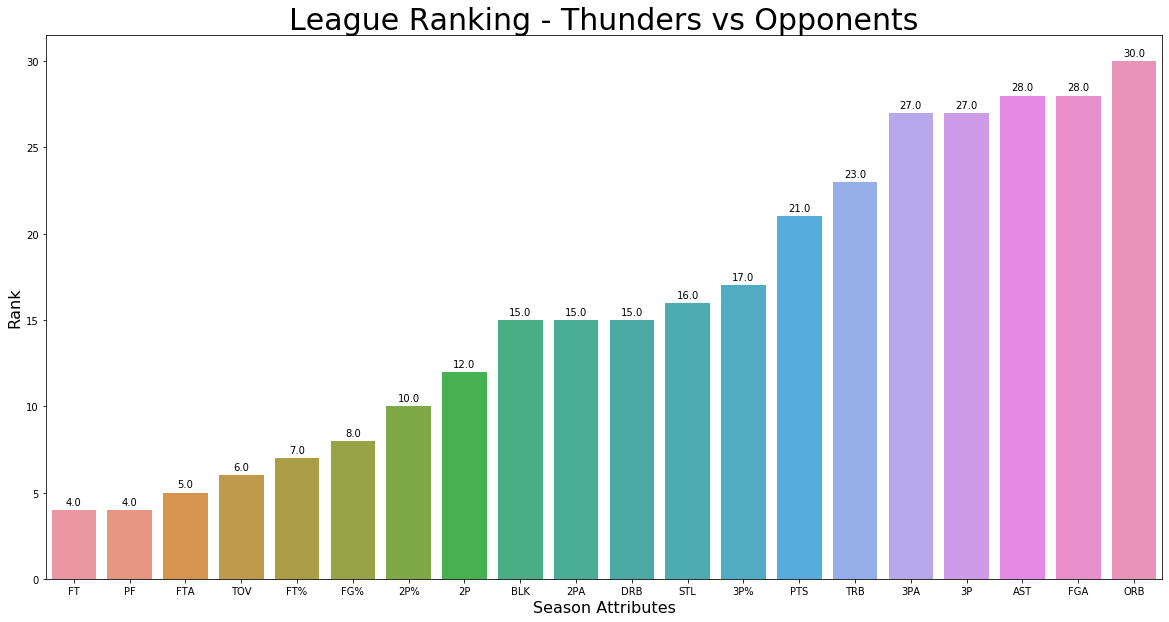

In [57]:
# bar plot to visualisation

plt.figure(figsize=(20,10))
p = sns.barplot(x = x, y = y)
plt.title("League Ranking - Thunders vs Opponents", fontsize=30)
plt.xlabel("Season Attributes", fontsize=16)
plt.ylabel("Rank", fontsize=16)

# for loop to print values on bar chart
for idx,value in enumerate(y):
    p.text(idx,value + 0.3,str(value),ha = 'center')

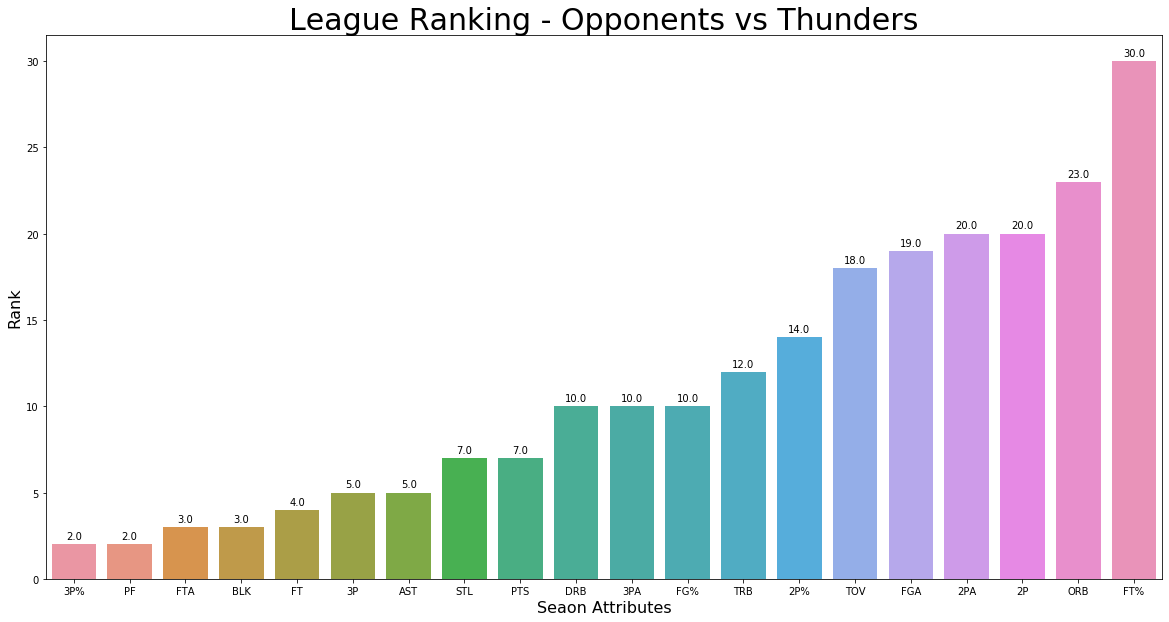

In [58]:
# bar plot to visualisation

plt.figure(figsize=(20,10))
p = sns.barplot(x = a, y = b)
plt.title("League Ranking - Opponents vs Thunders", fontsize=30)
plt.xlabel("Seaon Attributes", fontsize=16)
plt.ylabel("Rank", fontsize=16)

# for loop to print values on bar chart
for idx,value in enumerate(b):
    p.text(idx,value + 0.3,str(value),ha = 'center')

# Spider plots - How did the players perform?

In [191]:
#importing season stats for OKC players and preprocessing

TRS = pd.read_excel("OKC.xlsx", sheet_name='Thunders - regular season')
TRS.drop([TRS.index[17]] , axis=0, inplace= True)
TRS.drop(['AST/TO'], axis=1, inplace = True)

TRS.head()

,NAME,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,EFG%
0,Shai Gilgeous-Alexander SG,70,70,34.7,19.0,0.7,5.2,5.9,3.3,1.1,0.7,1.9,1.7,17.76,6.8,14.5,47.1,1.2,3.6,34.7,4.1,5.1,80.7,5.6,10.9,51.2,1.311,0.51,0.514
1,Dennis Schroder PG,65,2,30.8,18.9,0.3,3.3,3.6,4.0,0.7,0.2,2.6,2.2,16.77,7.0,14.8,46.9,1.9,5.0,38.5,3.0,3.6,83.9,5.0,9.8,51.2,1.274,0.53,0.534
2,Danilo Gallinari PF,62,62,29.6,18.7,0.5,4.6,5.2,1.9,0.7,0.1,1.2,1.2,19.50,5.8,13.2,43.8,2.9,7.1,40.5,4.3,4.8,89.3,2.9,6.1,47.6,1.420,0.55,0.547
3,Chris Paul PG,70,70,31.5,17.6,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,21.72,6.2,12.7,48.9,1.6,4.3,36.5,3.6,4.0,90.7,4.6,8.3,55.4,1.389,0.55,0.552
4,Steven Adams C,63,63,26.7,10.9,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,20.48,4.5,7.6,59.2,0.0,0.0,33.3,1.9,3.2,58.2,4.5,7.5,59.4,1.431,0.59,0.593


In [192]:
TRS.tail()

,NAME,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,EFG%
12,Andre Roberson SG,7,0,12.4,2.9,1.0,2.9,3.9,0.6,0.1,0.4,0.3,1.9,5.46,1.1,4.1,27.6,0.4,2.0,21.4,0.1,0.3,50.0,0.7,2.1,33.3,0.690,0.33,0.328
13,Deonte Burton SG,39,0,9.1,2.7,0.2,1.3,1.5,0.4,0.2,0.3,0.5,0.9,4.31,1.1,3.2,34.4,0.3,1.4,18.9,0.2,0.4,57.1,0.8,1.8,45.8,0.832,0.38,0.384
14,Devon Hall SG,11,0,7.4,1.8,0.2,0.5,0.6,1.2,0.4,0.1,0.5,0.5,3.14,0.5,2.7,20.0,0.4,1.5,23.5,0.4,0.7,50.0,0.2,1.2,15.4,0.667,0.27,0.267
15,Justin Patton C,5,0,4.8,1.8,0.2,0.8,1.0,0.4,0.0,0.0,0.4,0.8,4.72,0.8,2.0,40.0,0.2,0.8,25.0,0.0,0.0,0.0,0.6,1.2,50.0,0.900,0.45,0.450
16,Kevin Hervey PF,10,0,5.2,1.7,0.1,1.1,1.2,0.5,0.1,0.1,0.0,0.4,5.04,0.7,2.7,25.9,0.3,2.0,15.0,0.0,0.0,0.0,0.4,0.7,57.1,0.630,0.31,0.315


In [193]:
TRS[['EFG%']] = TRS[['EFG%']] * 100
TRS.head()

,NAME,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,EFG%
0,Shai Gilgeous-Alexander SG,70,70,34.7,19.0,0.7,5.2,5.9,3.3,1.1,0.7,1.9,1.7,17.76,6.8,14.5,47.1,1.2,3.6,34.7,4.1,5.1,80.7,5.6,10.9,51.2,1.311,0.51,51.4
1,Dennis Schroder PG,65,2,30.8,18.9,0.3,3.3,3.6,4.0,0.7,0.2,2.6,2.2,16.77,7.0,14.8,46.9,1.9,5.0,38.5,3.0,3.6,83.9,5.0,9.8,51.2,1.274,0.53,53.4
2,Danilo Gallinari PF,62,62,29.6,18.7,0.5,4.6,5.2,1.9,0.7,0.1,1.2,1.2,19.50,5.8,13.2,43.8,2.9,7.1,40.5,4.3,4.8,89.3,2.9,6.1,47.6,1.420,0.55,54.7
3,Chris Paul PG,70,70,31.5,17.6,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,21.72,6.2,12.7,48.9,1.6,4.3,36.5,3.6,4.0,90.7,4.6,8.3,55.4,1.389,0.55,55.2
4,Steven Adams C,63,63,26.7,10.9,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,20.48,4.5,7.6,59.2,0.0,0.0,33.3,1.9,3.2,58.2,4.5,7.5,59.4,1.431,0.59,59.3


In [194]:
#importing careers stats for OKC players

Career = pd.read_excel("OKC.xlsx", sheet_name='Career')
Career[['3P%','2P%','eFG%','FT%']] = Career[['3P%','2P%','eFG%','FT%']] * 100
Career.head()

,Name,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Shai Gilgeous-Alexander SG,152,143,30.3,5.4,11.4,0.473,0.9,2.6,35.4,4.5,8.8,50.8,51.3,2.9,3.6,80.4,0.7,3.6,4.2,3.3,1.2,0.6,1.8,1.9,14.6
1,Dennis Schroder PG,496,177,25.5,5.3,12.2,0.436,1.1,3.4,33.7,4.2,8.8,47.4,48.2,2.3,2.8,82.8,0.4,2.4,2.8,4.6,0.8,0.1,2.4,1.9,14.1
2,Danilo Gallinari PF,611,541,30.9,4.9,11.5,0.427,2.0,5.2,38.0,2.9,6.3,46.5,51.3,4.4,5.0,87.3,0.7,4.2,4.9,2.0,0.8,0.4,1.3,1.8,16.2
3,Chris Paul PG,1020,1020,34.9,6.5,13.7,0.471,1.4,3.7,37.0,5.1,10.1,50.7,52.0,4.2,4.8,87.0,0.7,3.9,4.5,9.5,2.2,0.1,2.4,2.5,18.5
4,Steven Adams C,530,466,26.8,4.1,6.9,0.589,0.0,0.0,10.0,4.1,6.9,59.0,58.9,1.7,3.0,55.7,3.4,4.2,7.6,1.2,0.9,1.0,1.4,2.6,9.8


In [197]:
#clearing the format in name column to remove junk values

for i in TRS.index:
    TRS['NAME'].loc[i] = unicodedata.normalize("NFKD", TRS['NAME'][i])

In [198]:
TRS.tail()

,NAME,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,EFG%
12,Andre Roberson SG,7,0,12.4,2.9,1.0,2.9,3.9,0.6,0.1,0.4,0.3,1.9,5.46,1.1,4.1,27.6,0.4,2.0,21.4,0.1,0.3,50.0,0.7,2.1,33.3,0.690,0.33,32.8
13,Deonte Burton SG,39,0,9.1,2.7,0.2,1.3,1.5,0.4,0.2,0.3,0.5,0.9,4.31,1.1,3.2,34.4,0.3,1.4,18.9,0.2,0.4,57.1,0.8,1.8,45.8,0.832,0.38,38.4
14,Devon Hall SG,11,0,7.4,1.8,0.2,0.5,0.6,1.2,0.4,0.1,0.5,0.5,3.14,0.5,2.7,20.0,0.4,1.5,23.5,0.4,0.7,50.0,0.2,1.2,15.4,0.667,0.27,26.7
15,Justin Patton C,5,0,4.8,1.8,0.2,0.8,1.0,0.4,0.0,0.0,0.4,0.8,4.72,0.8,2.0,40.0,0.2,0.8,25.0,0.0,0.0,0.0,0.6,1.2,50.0,0.900,0.45,45.0
16,Kevin Hervey PF,10,0,5.2,1.7,0.1,1.1,1.2,0.5,0.1,0.1,0.0,0.4,5.04,0.7,2.7,25.9,0.3,2.0,15.0,0.0,0.0,0.0,0.4,0.7,57.1,0.630,0.31,31.5


In [199]:
# creating a new column for position

TRS['Position'] = [ x[len(x)-x[::-1].find(' '):]  for x in TRS['NAME']]

TRS.tail()

,NAME,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,EFG%,Position
12,Andre Roberson SG,7,0,12.4,2.9,1.0,2.9,3.9,0.6,0.1,0.4,0.3,1.9,5.46,1.1,4.1,27.6,0.4,2.0,21.4,0.1,0.3,50.0,0.7,2.1,33.3,0.690,0.33,32.8,SG
13,Deonte Burton SG,39,0,9.1,2.7,0.2,1.3,1.5,0.4,0.2,0.3,0.5,0.9,4.31,1.1,3.2,34.4,0.3,1.4,18.9,0.2,0.4,57.1,0.8,1.8,45.8,0.832,0.38,38.4,SG
14,Devon Hall SG,11,0,7.4,1.8,0.2,0.5,0.6,1.2,0.4,0.1,0.5,0.5,3.14,0.5,2.7,20.0,0.4,1.5,23.5,0.4,0.7,50.0,0.2,1.2,15.4,0.667,0.27,26.7,SG
15,Justin Patton C,5,0,4.8,1.8,0.2,0.8,1.0,0.4,0.0,0.0,0.4,0.8,4.72,0.8,2.0,40.0,0.2,0.8,25.0,0.0,0.0,0.0,0.6,1.2,50.0,0.900,0.45,45.0,C
16,Kevin Hervey PF,10,0,5.2,1.7,0.1,1.1,1.2,0.5,0.1,0.1,0.0,0.4,5.04,0.7,2.7,25.9,0.3,2.0,15.0,0.0,0.0,0.0,0.4,0.7,57.1,0.630,0.31,31.5,PF


In [200]:
# separating the name and position from name column

TRS['NAME'] = [ x[:len(x)-x[::-1].find(' ')-1]  for x in TRS['NAME']]

In [201]:
TRS.tail()

,NAME,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,EFG%,Position
12,Andre Roberson,7,0,12.4,2.9,1.0,2.9,3.9,0.6,0.1,0.4,0.3,1.9,5.46,1.1,4.1,27.6,0.4,2.0,21.4,0.1,0.3,50.0,0.7,2.1,33.3,0.690,0.33,32.8,SG
13,Deonte Burton,39,0,9.1,2.7,0.2,1.3,1.5,0.4,0.2,0.3,0.5,0.9,4.31,1.1,3.2,34.4,0.3,1.4,18.9,0.2,0.4,57.1,0.8,1.8,45.8,0.832,0.38,38.4,SG
14,Devon Hall,11,0,7.4,1.8,0.2,0.5,0.6,1.2,0.4,0.1,0.5,0.5,3.14,0.5,2.7,20.0,0.4,1.5,23.5,0.4,0.7,50.0,0.2,1.2,15.4,0.667,0.27,26.7,SG
15,Justin Patton,5,0,4.8,1.8,0.2,0.8,1.0,0.4,0.0,0.0,0.4,0.8,4.72,0.8,2.0,40.0,0.2,0.8,25.0,0.0,0.0,0.0,0.6,1.2,50.0,0.900,0.45,45.0,C
16,Kevin Hervey,10,0,5.2,1.7,0.1,1.1,1.2,0.5,0.1,0.1,0.0,0.4,5.04,0.7,2.7,25.9,0.3,2.0,15.0,0.0,0.0,0.0,0.4,0.7,57.1,0.630,0.31,31.5,PF


In [202]:
#sorting values by name to ensure uniformity

Sort = TRS.sort_values(by=['NAME'])
Sort.head()

,NAME,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,EFG%,Position
8,Abdel Nader,55,6,15.8,6.3,0.3,1.6,1.8,0.7,0.4,0.4,0.8,1.4,11.36,2.2,4.8,46.8,0.9,2.3,37.5,0.9,1.2,77.3,1.4,2.5,55.6,1.312,0.56,55.9,SF
12,Andre Roberson,7,0,12.4,2.9,1.0,2.9,3.9,0.6,0.1,0.4,0.3,1.9,5.46,1.1,4.1,27.6,0.4,2.0,21.4,0.1,0.3,50.0,0.7,2.1,33.3,0.690,0.33,32.8,SG
3,Chris Paul,70,70,31.5,17.6,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,21.72,6.2,12.7,48.9,1.6,4.3,36.5,3.6,4.0,90.7,4.6,8.3,55.4,1.389,0.55,55.2,PG
2,Danilo Gallinari,62,62,29.6,18.7,0.5,4.6,5.2,1.9,0.7,0.1,1.2,1.2,19.50,5.8,13.2,43.8,2.9,7.1,40.5,4.3,4.8,89.3,2.9,6.1,47.6,1.420,0.55,54.7,PF
9,Darius Bazley,61,9,18.5,5.6,0.5,3.5,4.0,0.7,0.4,0.7,0.7,0.9,9.64,2.0,5.2,39.4,0.8,2.3,34.8,0.7,1.0,69.4,1.2,2.9,43.2,1.079,0.47,47.2,SF


In [203]:
SortC = Career.sort_values(by=['Name'])

In [204]:
SO = Sort[['PTS','AST','3P%','2P%','EFG%','FT%']]
SO.head()

,PTS,AST,3P%,2P%,EFG%,FT%
8,6.3,0.7,37.5,55.6,55.9,77.3
12,2.9,0.6,21.4,33.3,32.8,50.0
3,17.6,6.7,36.5,55.4,55.2,90.7
2,18.7,1.9,40.5,47.6,54.7,89.3
9,5.6,0.7,34.8,43.2,47.2,69.4


In [205]:
CO = SortC[['PTS','AST','3P%','2P%','eFG%','FT%']]
CO.head()

,PTS,AST,3P%,2P%,eFG%,FT%
8,4.5,0.5,35.2,48.2,50.3,71.6
12,4.6,0.9,25.5,60.4,52.3,46.8
3,18.5,9.5,37.0,50.7,52.0,87.0
2,16.2,2.0,38.0,46.5,51.3,87.3
9,5.6,0.7,34.8,43.2,47.2,69.4


C:\Users\Guru Prasad\Anaconda3\lib\site-packages\matplotlib\projections\polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


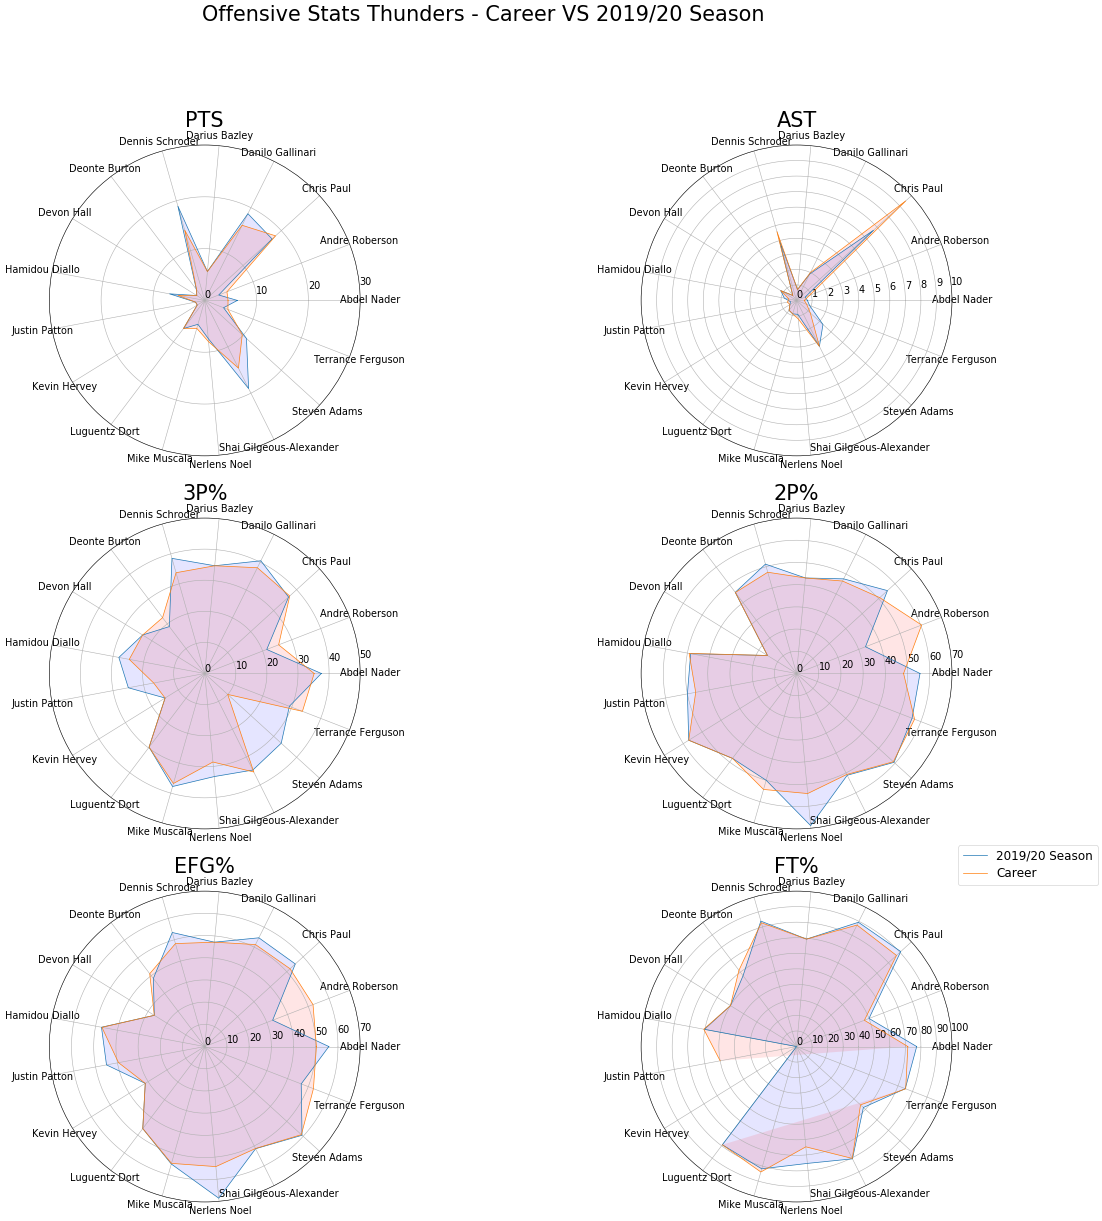

In [207]:
#Visualizing the performance of players using Spider plot

my_dpi=50
plt.figure(figsize=(1400/my_dpi, 1400/my_dpi), dpi=my_dpi)

cols = SO.columns.values.tolist()

for i in range(0,len(cols)):
    
    
    # number of variable
    categories=list(Sort['NAME'])
    N = len(categories)

    # finding the angle of each axis in the plot (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,2,i+1, polar=True)
    ax.set_title(cols[i],size=30,y = 1)
   

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=14, rotation = 30)

    if (cols[i] == 'PTS'):
        ax.set_rlabel_position(5)
        plt.yticks([0,10,20,30], ["0","10","20","30",], color="black", size=14)
        plt.ylim(0,30)
    
    elif (cols[i] == 'AST'):
        ax.set_rlabel_position(5)
        plt.yticks([0,1,2,3,4,5,6,7,8,9,10], ["0","1","2","3","4","5","6","7","8","9","10"], color="black", size=14)
        plt.ylim(0,10)
    
    elif (cols[i] == '3P%'):
        ax.set_rlabel_position(5)
        plt.yticks([0,10,20,30,40,50], ["0","10","20","30","40","50"], color="black", size=14)
        plt.ylim(0,50)
    
    elif (cols[i] == '2P%') or (cols[i] == 'EFG%') or (cols[i] == 'eFG%'):
        
        ax.set_rlabel_position(5)
        plt.yticks([0,10,20,30,40,50,60,70], ["0","10","20","30","40","50","60","70"], color="black", size=14)
        plt.ylim(0,70)
    elif (cols[i] == 'FT%'):
        ax.set_rlabel_position(5)
        plt.yticks([0,10,20,30,40,50,60,70,80,90,100], ["0","10","20","30","40","50","60","70","80","90","100"], color="black", size=14)
        plt.ylim(0,100)
    
    else:    
        # Draw ylabels
        print("Nothing")
        

    # Plot data
    values=SO.iloc[:,i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label= '2019/20 Season')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    # Plot data
    values=CO.iloc[:,i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Career')
    # Fill area
    ax.fill(angles, values, 'r', alpha=0.1)
    
    
    
plt.legend(loc= 3 ,bbox_to_anchor=(1, 1), fontsize = 'xx-large')
plt.suptitle("Offensive Stats Thunders - Career VS 2019/20 Season",size=30)
plt.show()

In [208]:
SD = TRS[['NAME','STL','REB','BLK','TO']]
SD.head()

,NAME,STL,REB,BLK,TO
0,Shai Gilgeous-Alexander,1.1,5.9,0.7,1.9
1,Dennis Schroder,0.7,3.6,0.2,2.6
2,Danilo Gallinari,0.7,5.2,0.1,1.2
3,Chris Paul,1.6,5.0,0.2,2.3
4,Steven Adams,0.8,9.3,1.1,1.5


In [209]:
CD = Career[['Name','STL','TRB','BLK','TOV']]
CD.head()

,Name,STL,TRB,BLK,TOV
0,Shai Gilgeous-Alexander SG,1.2,4.2,0.6,1.8
1,Dennis Schroder PG,0.8,2.8,0.1,2.4
2,Danilo Gallinari PF,0.8,4.9,0.4,1.3
3,Chris Paul PG,2.2,4.5,0.1,2.4
4,Steven Adams C,0.9,7.6,1.0,1.4


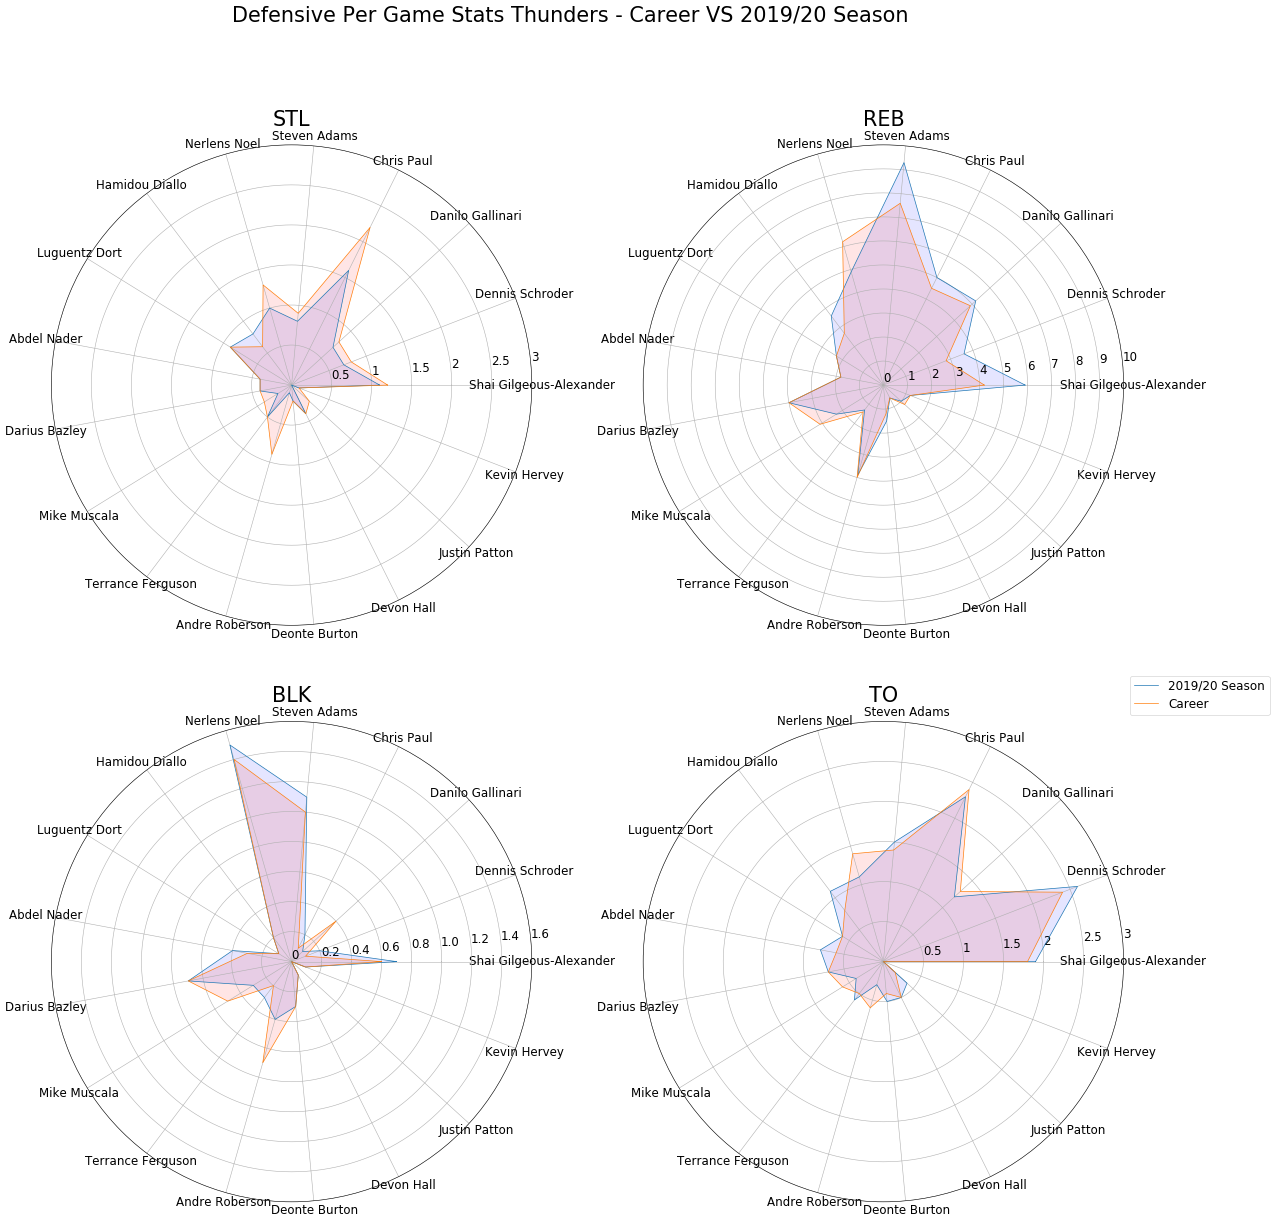

In [210]:
#Visualizing the performance of players using Spider plot

my_dpi=50
plt.figure(figsize=(1400/my_dpi, 1400/my_dpi), dpi=my_dpi)

cols = SD.columns.values.tolist()

for i in range(1,len(cols)):
    #print(i)
    # number of variable
    categories=list(SD['NAME'])
    N = len(categories)

    # finding the angle of each axis in the plot (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,i, polar=True)
    ax.set_title(cols[i],size=30,y = 1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=17, rotation = 30)

    if (cols[i] == 'STL') or (cols[i] == 'TO') or (cols[i] == 'TOV'):
        ax.set_rlabel_position(5)
        plt.yticks([0.5,1,1.5,2,2.5,3], ["0.5","1","1.5","2","2.5","3"], color="black", size=17)
        plt.ylim(0,3)
    
    elif (cols[i] == 'BLK'):
        ax.set_rlabel_position(5)
        plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6], ["0","0.2","0.4","0.6","0.8","1.0","1.2","1.4","1.6"], color="black", size=17)
        plt.ylim(0,1.6)
    
    else:    
        # Draw ylabels
        ax.set_rlabel_position(5)
        plt.yticks([0,1,2,3,4,5,6,7,8,9,10], ["0","1","2","3","4","5","6","7","8","9","10"], color="black", size=17)
        plt.ylim(0,10)

    # Plot data
    values=SD.iloc[:,i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label= '2019/20 Season')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    # Plot data
    values=CD.iloc[:,i].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label='Career')
    # Fill area
    ax.fill(angles, values, 'r', alpha=0.1)
    

plt.legend(loc= 3 ,bbox_to_anchor=(1, 1), fontsize = 'xx-large')
plt.suptitle("Defensive Per Game Stats Thunders - Career VS 2019/20 Season", size=30)

plt.show()